# CPSC 330 hw1

**About this assignment:** There is no machine learning in this assignment. The main purpose of this assignment is to check whether your programming knowledge is adequate to take CPSC 330. For some of you, Python will be familiar; for others, Python will be new. Either way, if you find this assignment very difficult then that could be a sign that you will struggle later on in the course. While CPSC 330 is a machine learning course rather than a programming course, Python will be an essential part of it.

Also: as part of this assignment you will likely need to consult the documentation for various Python packages we're using. This is, of course, totally OK and in fact strongly encouraged. Reading and interpreting documentation is an important skill, and in fact is one of the skills this assignment is meant to assess.

## Set-up

In order to do this assignment, you will need to set up the CPSC 330 software stack, which is Python and Jupyter. For software install help, see [here](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/docs/python_info.md). One you have the software stack installed, you should be able to run the next cell, which imports some packages needed for the assignment.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

All assignments will be submitted through GitHub. For more information, see [here](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/docs/git_installation.md).

## Points

Each question or sub-question will have a number of points allocated to it. For example, the "rubric={points:3}" below means that following the instructions is worth 3 points/marks.

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/docs/homework_instructions.md). 



## Exercise 1: Geometric Brownian motion
rubric={points:6}

We will simulate a stock's price fluctuation over time by assuming the stock price follows a [_geometric Brownian motion_](https://en.wikipedia.org/wiki/Geometric_Brownian_motion). In geometric Brownian motion, at each time step you _multiply_ your current state by a (positive) random amount. An example is shown in the figure below:

![](stockprice_small.png)

In our model of stock prices, the current price at time $t$, denoted $S_t$, depends on the previous price $S_{t-1}$ as follows:

$$S_t = S_{t-1} \exp \left( -0.5\sigma^2 + \sigma Z \right)$$

where $Z$ is a random number drawn from a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution). You can generate these random draws with `np.random.randn()` and you can perform most of the math operations with numpy as well; for example, `np.exp(x)` computes $\exp(x)$, etc. Note that the mathematical notation $\exp(x)$ means $e^x$. 

The parameter $\sigma$ is the _volatility_ of the stock; a larger volatility means more price movement in a given amount of time. Thus, if $\sigma=0$ then the stock price never changes, whereas if $\sigma$ is large the stock price can change wildly. The figure above was generated using $S_0=10$, $T=1000$, and $\sigma=0.01$.

Your task: write a function `simulate` that takes as arguments $S_0$, $\sigma$, and $T$. This function should simulate the geometric Brownian motion for $T$ steps using the equation above, and then return an array of size $T+1$ containing the stock price at each time step. You should then use `matplotlib` to create a plot of the output, like the figure shown above.

Hint: start by initializing a numpy array of size $T+1$ using `np.zeros`, and then fill it in one-by-one with a `for` loop.

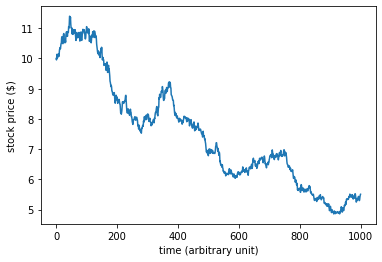

In [4]:
def simulate(S0,vol,t): 
    ret = np.zeros(t+1)
    ret[0] = S0
    for i in range(1,t+1):
        Z = np.random.randn()
        ret[i] = ret[i-1]*np.exp(-0.5*vol**2 + vol*Z)
    return(ret)

# plot the function with some time
time = range(0,1001)
stock_price = simulate(10,0.01,1000)
plt.plot(time,stock_price)
plt.xlabel("time (arbitrary unit)")
plt.ylabel("stock price ($)");

## Exercise 2: Smoothing a curve
rubric={points:12}

Your simulation from Exercise 1 shows the stock price at every time step, and is therefore very "bumpy". Investors may be more interested in a _smoothed_ depiction of the stock price over time, in which small ups and downs are removed, leaving only the salient trends. The figure below shows a smoothed stock price in red, generated using a moving average window with $W=25$:

![](stockprice_smooth25_small.png)

The smoothing is achieved by replacing the price at time $t$ with an average of all the prices from times $t-W$ to $t+W$ (inclusive), for some positive integer $W$ (thus, the total width of the window is $2W+1$). Near the edges of the plot, where we do not have enough data for the entire window, the average computed only over the portion of the window that is within the data range. For example, if $T=1000$ and $W=5$ then the smoothed curve at $t=0$ is the average of the prices from $t=0$ to $t=5$, the smoothed curve at $t=1$ is the average of the prices from $t=0$ to $t=6$, the smoothed curve at $t=10$ is the average of the prices from $t=5$ to $t=15$, and the smoothed curve at $t=997$ is the average of the prices from $t=992$ to $t=1000$.

Your task: write a function `smooth` that takes in an array of values (such as the output of `simulate`) and the window width $W$, and returns a smoothed version the input array using the sliding window averaging scheme described above. Set the default value of $W$ to $25$. The returned array should be the same size as the input array. Then, plot your result.

Hint: start by initializing a numpy array and then fill it in using a loop. At each iteration of the loop, compute the two ends of the window, taking into account the special cases if you are near the edge of the array. Then, you can slice the input array to take only the values in the window, and finally you can take the mean of these with `np.mean`.

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


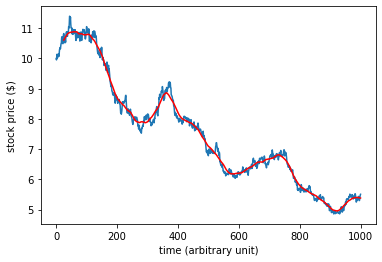

In [5]:
def smooth(St,W):
    ret = np.zeros(St.size)
    for i in range(St.size):
        if i-W < 0:
            ret[i] = np.mean(St[0: i+W])
        if i + W >= St.size:
            ret[i] = np.mean(St[i-W: St.size -1])
        else:
            ret[i] = np.mean(St[i-W : i+W])
    return ret

smooth_stock = smooth(stock_price, 25)
plt.plot(time,stock_price)
plt.plot(time,smooth_stock,color = "red")
plt.xlabel("time (arbitrary unit)")
plt.ylabel("stock price ($)");

## Exercise 3: Loading files with Pandas
rubric={points:8}

When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()` or Excel files using `pd.read_excel()`. Both of these functions have many parameters that help read data files of different structures and formats. Note that if you get an error when trying to use `pd.read_excel()`, you may have to install the `xlrd` dependency by using `conda install xlrd` at the command line.

In the "data" folder in this homework repository there are 8 different .csv and .xlsx files named `wine_#.csv/.txt/.xlsx`. Look at each of these files and use `pd.read_csv()` or `pd.read_excel()` to load these data so that they resemble the following:

| Bottle | Grape | Origin | Alcohol | pH | Color | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| 2 |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| 3 |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| 4 |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| 5 |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |

You are provided with tests that use `df.equals()` to check that all the dataframes are identical.


In [6]:
df1 = None
df2 = None
df3 = None
df4 = None
df5 = None
df6 = None
df7 = None
df8 = None

In [10]:
path = '/Users/apple/Desktop/CPSC/330/hw1_x8p1b/data/'
df1 = pd.read_csv(path + 'wine_1.csv')
index = list(df1.columns)
df2 = pd.read_csv(path + 'wine_2.csv', skiprows = 1)
df3 = pd.read_csv(path + 'wine_3.csv',na_filter = False, skipfooter = 2)
df4 = pd.read_csv(path + 'wine_4.txt', sep = '\t')
df5 = pd.read_csv(path + 'wine_5.csv').drop(columns = "Add more columns")
df6 = pd.read_csv(path + 'wine_6.txt', sep = '\t', na_filter = False, header = None, skiprows = 2, error_bad_lines = False).drop(columns = [0,8])
df6.columns = index
df7 = pd.read_excel(path + 'wine_7.xlsx')
df8 = pd.read_excel(path + 'wine_8.xlsx', 'DATA')

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """
b'Skipping line 8: expected 9 fields, saw 10\nSkipping line 9: expected 9 fields, saw 10\n'


In [11]:
for i, df in enumerate([df2, df3, df4, df5, df6, df7, df8]):
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print('All tests passed.')

All tests passed.


## Exercise 4: The Titanic dataset

The file *titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this exercise you will perform a number of wrangling operations to manipulate and extract subsets of the data.

#### 4(a)
rubric={points:1}

Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

In [12]:
titanic_df = None
titanic_df = pd.read_csv(path + 'titanic.csv')

In [13]:
assert set(titanic_df.columns) == set(['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


#### 4(b)
rubric={points:1}

The column names `sibsp` and `parch` are not very descriptive. Use `df.rename()` to rename these columns to `siblings_spouses` and `parents_children` respectively.

In [14]:
titanic_df = titanic_df.rename(columns = {'sibsp':'siblings_spouses'})
titanic_df = titanic_df.rename(columns = {"parch": 'parents_children'}) 

In [15]:
assert set(['siblings_spouses', 'parents_children']).issubset(titanic_df.columns), "Column names were not changed properly"
print("Success")

Success


#### 4(c)
rubric={points:2}

We will practice indexing different subsets of the dataframe in the following questions.

Select the column `age` using single bracket notation `[]`. What type of object is returned?

In [16]:
age = titanic_df['age']
vtype = type(age)
f"column age type is: {vtype}"

"column age type is: <class 'pandas.core.series.Series'>"

#### 4(d)
rubric={points:2}

Now select the `age` using double bracket notation `[[]]`. What type of object is returned?

In [17]:
age = titanic_df[['age']]
vtype = type(age)
f"column age type is: {vtype}"

"column age type is: <class 'pandas.core.frame.DataFrame'>"

#### 4(e)
rubric={points:1}

Select the columns `pclass`, `survived`, and `age` using a single line of code.

In [18]:
cols = titanic_df[['pclass', 'survived', 'age']]
# cols

#### 4(f)
rubric={points:2}

Use the `iloc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [19]:
cols5 = cols.iloc[0:5]
cols5

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000


#### 4(g)
rubric={points:2}

Now use the `loc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [20]:
cols5 = cols.loc[0:4]
cols5

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000


#### 4(h)
rubric={points:1}

How many passengers survived (`survived = 1`) the disaster? (hint: try using `df.query()` or `[]` notation to subset the dataframe and then `df.shape()` to check its size).

In [21]:
survived = titanic_df[(titanic_df['survived'] == 1)]
len(survived)

500

#### 4(i)
rubric={points:1}

How many passengers that survived the disaster (`survived = 1`) were over 60 years of age?

In [22]:
 len(survived.query('age > 60'))

8

#### 4(j)
rubric={points:2}

What was the lowest and highest fare paid to board the titanic? Store your answers as floats in the variables `lowest` and `highest`.

In [23]:
lowest = titanic_df['fare'].min()
highest = titanic_df['fare'].max()

#### 4(k)
rubric={points:1}

Sort the dataframe by fare paid (most to least).

In [24]:
sorted = titanic_df.sort_values(by='fare', ascending = True)

#### 4(l)
rubric={points:1}

Save the sorted dataframe to a .csv file called 'titanic_fares.csv' using `to_csv()`.

In [25]:
sorted.to_csv('titanic_fares.csv')

## Exercise 5: Scavenger Hunt

For each of the following cases, index into the Python object to obtain the "T" (for Treasure). Your code should always print out `'T'` at the end. 

In [26]:
import string
letters = string.ascii_uppercase

The first one is done for you as an example.

#### Example question

In [27]:
x = ("nothing",{-i : l for i, l in enumerate(letters)})

**Example answer**:

In [28]:
x[1][-19]

'T'

**Explanation:** In these questions, the goal is not to understand the code itself, which may be confusing. Instead, try to probe the types of the various objects. For example `type(x)` reveals that `x` is a tuple, and `len(x)` reveals that it has two elements. Element 0 just contains "nothing", but element 1 contains more stuff, hence `x[1]`. Then we can again probe `type(x[1])` and see that it's a dictionary. If you `print(x[1])` you'll see that the letter "T" corresponds to the key -19, hence `x[1][-19]`.

#### 5(a)
rubric={points:2}

In [29]:
x = [[letters[i] for i in range(26) if i % 2 == 0], [letters[i] for i in range(26) if i % 2 == 1]]

In [30]:
x[1][9]

'T'

#### 5(b)
rubric={points:2}

In [31]:
np.random.seed(1)
x = np.random.choice(list(set(letters)-set("T")),size=(100, 26),replace=True)
x[np.random.randint(100),np.random.randint(26)] = "T"

In [32]:
index = np.where(x == 'T')
x[index][0]

'T'

#### 5(c)
rubric={points:2}

In [33]:
n = 26
x = dict()
for i in range(n):
    x[string.ascii_lowercase[i]] = {string.ascii_lowercase[(j+1)%n] : [[letters[j]] if j-2==i else None] for j in range(n)}

In [34]:
x["r"]['u'][0][0]

'T'